In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


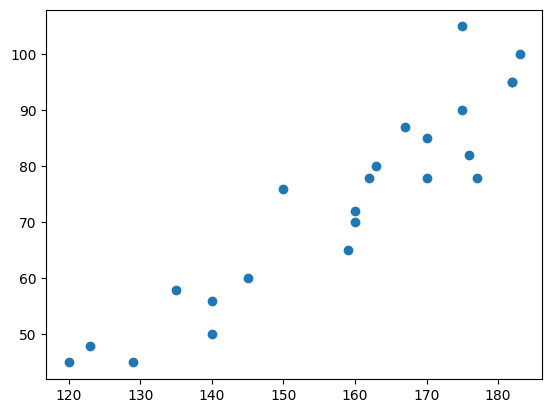

In [5]:
#its important to check the relationship betweeen the features and target variable
plt.scatter(df['Height'], df['Weight'])  

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


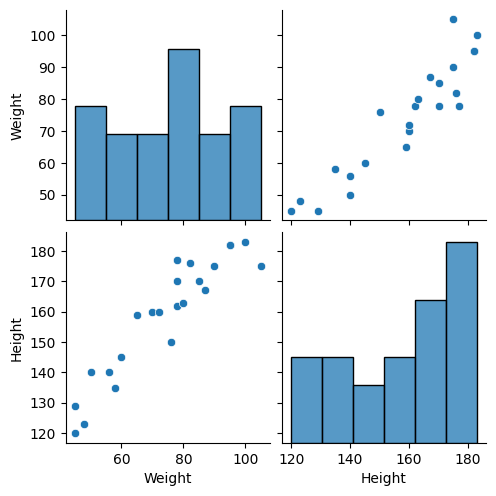

In [9]:
import seaborn as sns
sns.pairplot(df)

In [13]:
#its super important to keep yor independent variables in a 2D array or dataframe
X = df[['Weight']].values#when you put a single column in a dataframe, it will be converted to a 1D array, so we need to use double brackets to keep it as a 2D array
y = df['Height'].values

In [11]:
X

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [26]:
#apply linearegression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [31]:
regression.coef_


array([17.03440872])

In [32]:
regression.intercept_

157.5

Text(0.5, 0, 'Weight')

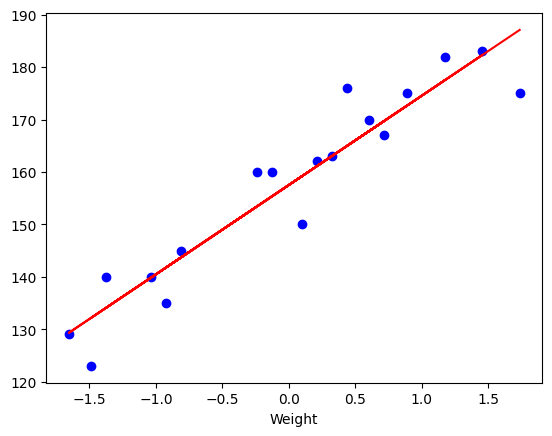

In [35]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train,regression.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Weight')


In [47]:
y_pred = regression.predict(X_test)#y_pred = intercept_ + regression.coef_ * X_test= 157.5+17.03440872 * X_test
y_pred


array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

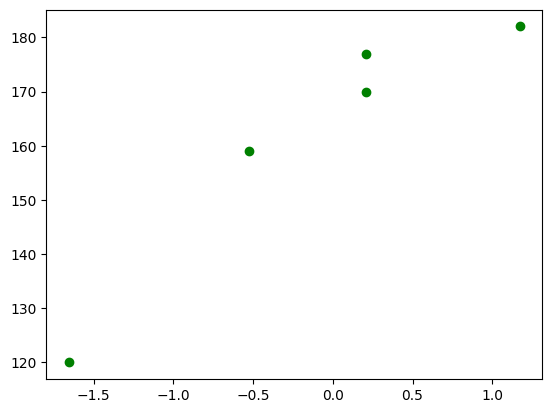

In [48]:
plt.scatter(X_test, y_test, color='green', label='Test Data')

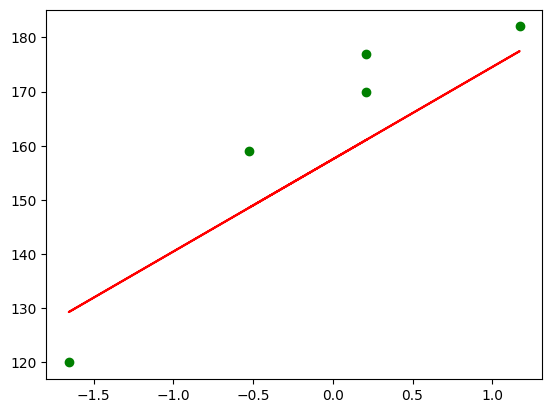

In [53]:
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')  
